In [1]:
from __future__ import print_function
import sys
sys.path.append('../build/')
%pylab inline
np.set_printoptions(precision=4, suppress=True)

/home/game/python/local/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


Populating the interactive namespace from numpy and matplotlib


In [2]:
import versor as vsr
from versor.drawing import *

# Points and Spheres

In [3]:
motor = vsr.Vec(1,1,1).trs() * vsr.Rot(vsr.Biv(0,1,0) * np.pi/6.0)
points_a = [vsr.Vec(*np.random.rand(3) * 2.).null() for i in range(3)]
points_b = [point.spin(motor) for point in points_a]
vectors = [b - a for a,b in zip(points_a, points_b)]
spheres_a = [vsr.Sph(point, np.random.rand(1) * 0.4 + 0.2) for point in points_a]
spheres_b = [sphere.spin(motor) for sphere in spheres_a]

## Points

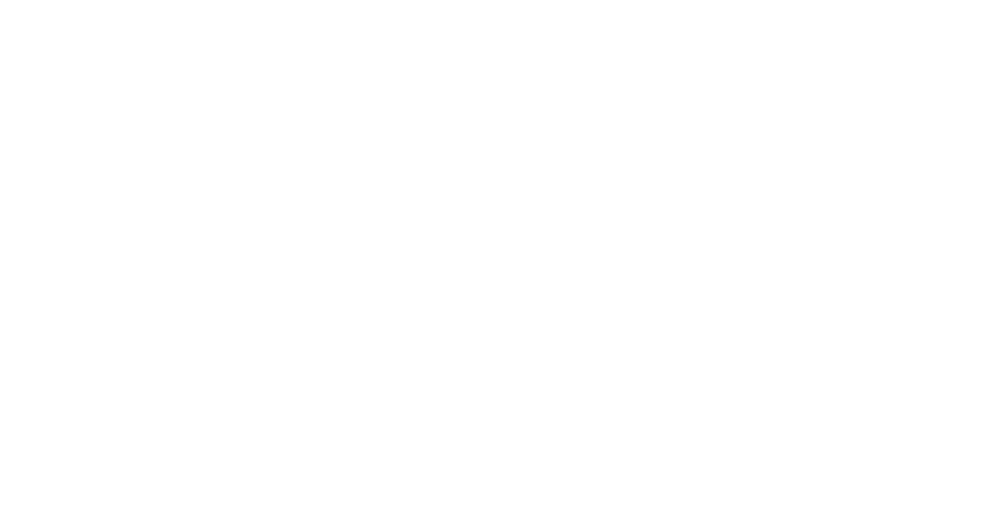

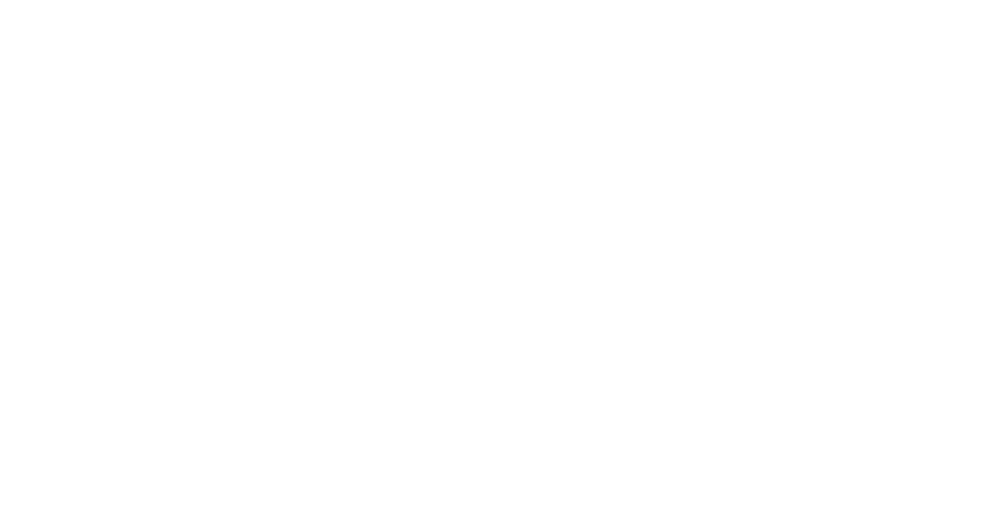

In [5]:
scene = Scene(children=
              [point_mesh(point,color=Colors.HOTPINK) for point in points_a] +\
              [point_mesh(point,color=Colors.LIGHTSKYBLUE) for point in points_b] +\
              [vector_mesh((b-a).vec(), position=a, arrow=True, color=Colors.GRAY) for a,b in zip(points_a, points_b)] +\
              [frame_mesh(),AmbientLight(color='#cccccc')])

camera = PerspectiveCamera(position=[3, -3, 3])
renderer = Renderer(camera=camera, 
                    scene=scene, 
                    controls=[TrackballControls(controlling=camera)],
                    background = 'white',
                    width='960',
                    height='512')
display(renderer)

## Spheres

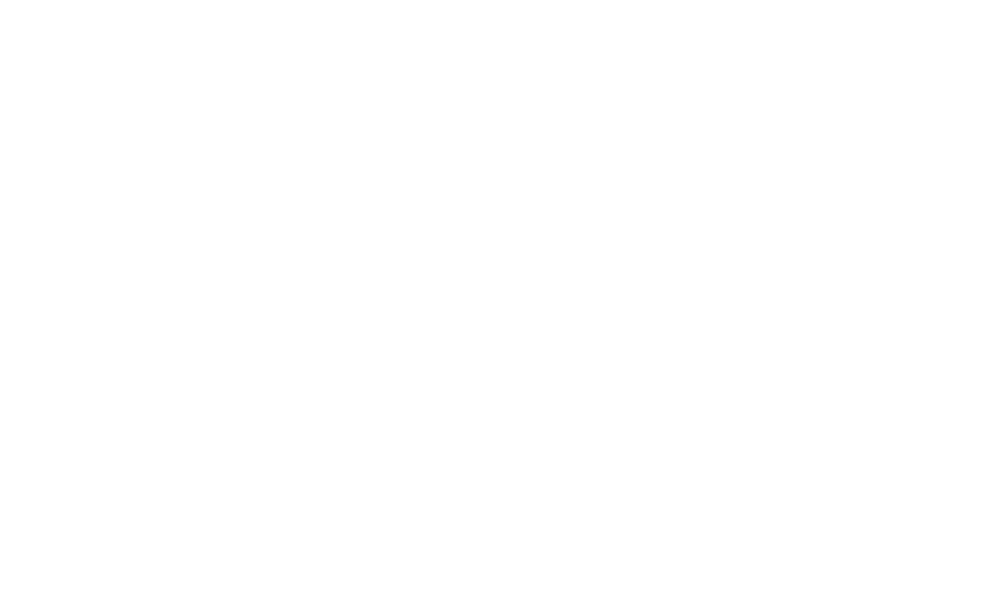

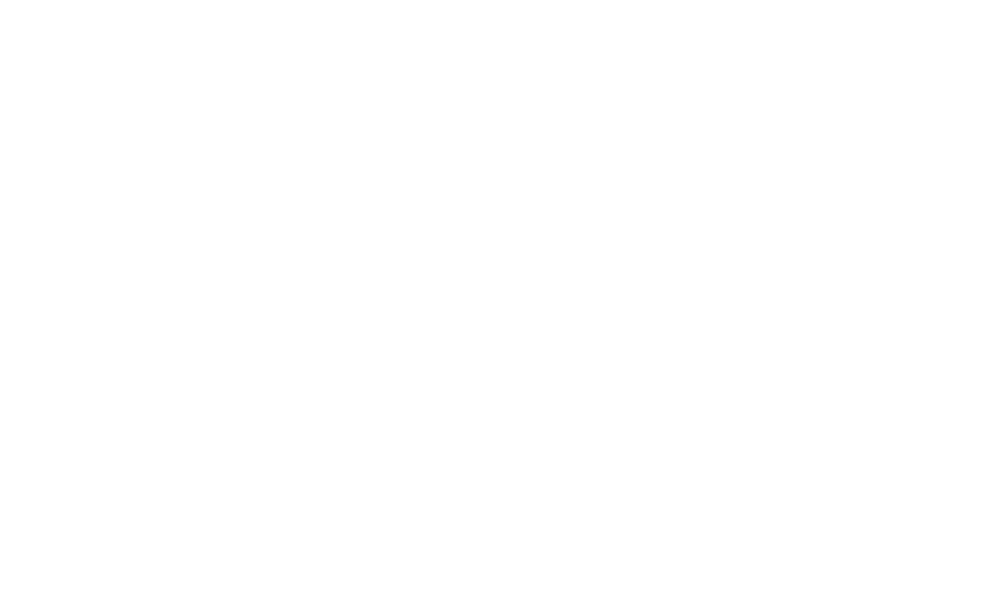

In [6]:
scene = Scene(children=
              [sphere_mesh(sphere,color=Colors.HOTPINK) for sphere in spheres_a] +\
              [sphere_mesh(sphere,color=Colors.LIGHTSKYBLUE) for sphere in spheres_b] +\
              [point_mesh(point,color=Colors.RED) for point in points_a] +\
              [point_mesh(point,color=Colors.BLUE) for point in points_b] +\
              [vector_mesh((b-a).vec(), position=a, arrow=True, color=Colors.BLACK) for a,b in zip(points_a, points_b)] +\
              [frame_mesh(),AmbientLight(color='#cccccc')])

camera = PerspectiveCamera(position=[3, -3, 3])
renderer = Renderer(camera=camera, 
                    scene=scene, 
                    controls=[TrackballControls(controlling=camera)],
                    background = 'white')
renderer.width = '800'
renderer.height = '600'

display(renderer)

# Lines and Planes

## Lines

In [7]:
def line_intersection(l1,l2):
    return(l1.loc(l1.comm(l2).unit().loc(vsr.Vec(0,0,0).null()))) 

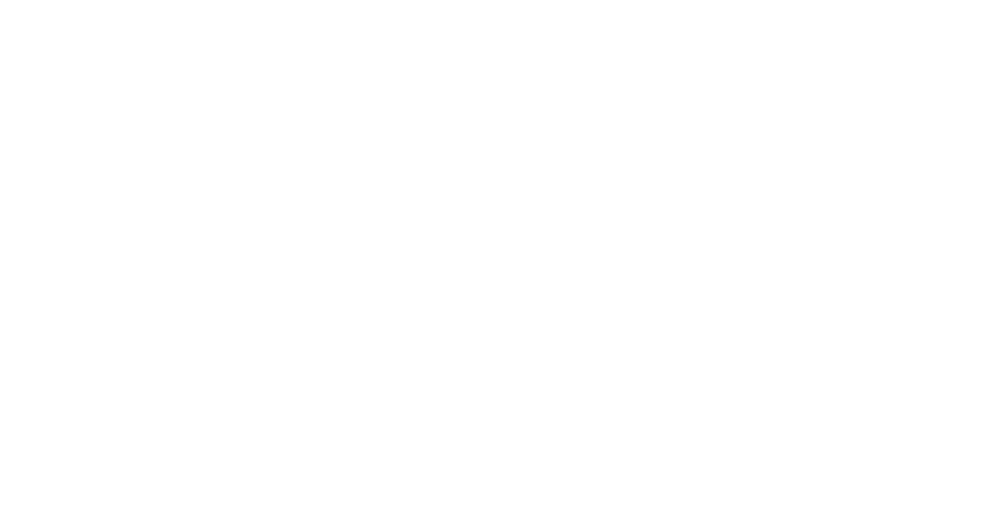

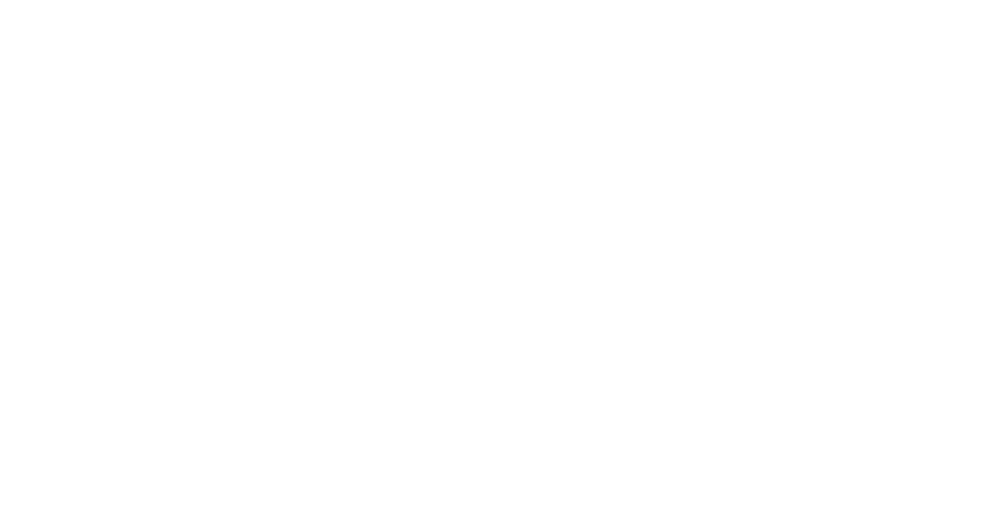

In [8]:
motor = vsr.Vec(1,0,1).trs() * vsr.Rot(vsr.Biv(1,0,0) * np.pi/6.0)

l1 = vsr.Dll(vsr.Vec(0,-1,0).null(), vsr.Vec(1,0,0).null()).unit()
l2 = l1.spin(motor)
l22 = l2.spin(vsr.Vec(0,0,-1).trs() * vsr.Rot(1,0,0,0))

m = ((l2 * l1.inv()).log() * 0.5 ).exp()
w = m.trs().reject_from(m.rot().log().unit())
v = m.trs().project_onto(m.rot().log().unit())
l11 = l1.spin(w.trs() * vsr.Rot(vsr.Biv(0,0,0)))
l22 = l2.spin((w).trs().rev() * vsr.Rot(1,0,0,0))

scene = Scene(children=[
        frame_mesh(),
        vector_mesh(w, position=l1.undual().meet(l22.undual()), color=Colors.GRAY),
        line_mesh(l1, color=Colors.HOTPINK, length=100),
        line_mesh(l22, color=Colors.LIGHTGRAY, length=100),
        line_mesh(l11, color=Colors.LIGHTGRAY, length=100),
        line_mesh(l1.comm(l2),color=Colors.GRAY),
        point_mesh(line_intersection(l1,l2)),
        point_mesh(line_intersection(l2,l1)),
        line_mesh(l2, color=Colors.LIGHTSKYBLUE, length=100),       
        AmbientLight(color='#cccccc')])
camera = PerspectiveCamera(position=[3, -3, 3])
renderer = Renderer(camera=camera, 
                    scene=scene, 
                    controls=[TrackballControls(controlling=camera)],
                    background = 'white')
renderer.width = '960'
renderer.height = '512'
display(renderer)

## Planes

In [9]:
n_planes = 10
planes_a = []
for i in range(10):
    dir_vec = np.random.normal(0.0, 0.8, 4)
    dir_vec = dir_vec / np.linalg.norm(dir_vec)
    distance = np.random.normal(0.0, 0.8,1)
    arr = dir_vec + distance
    planes_a.append(vsr.Dlp(dir_vec[0],dir_vec[1],dir_vec[2],distance[0]))
planes_b = [plane.spin(motor) for plane in planes_a]

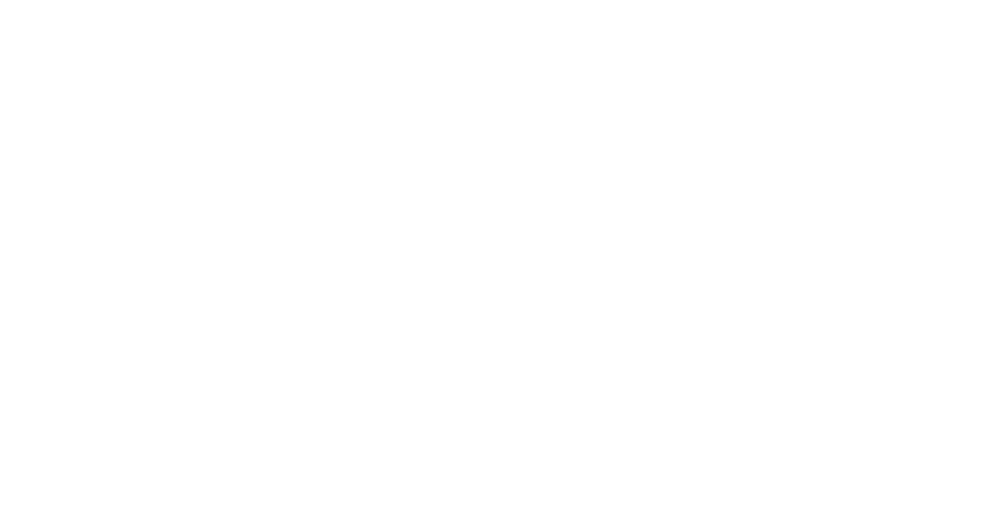

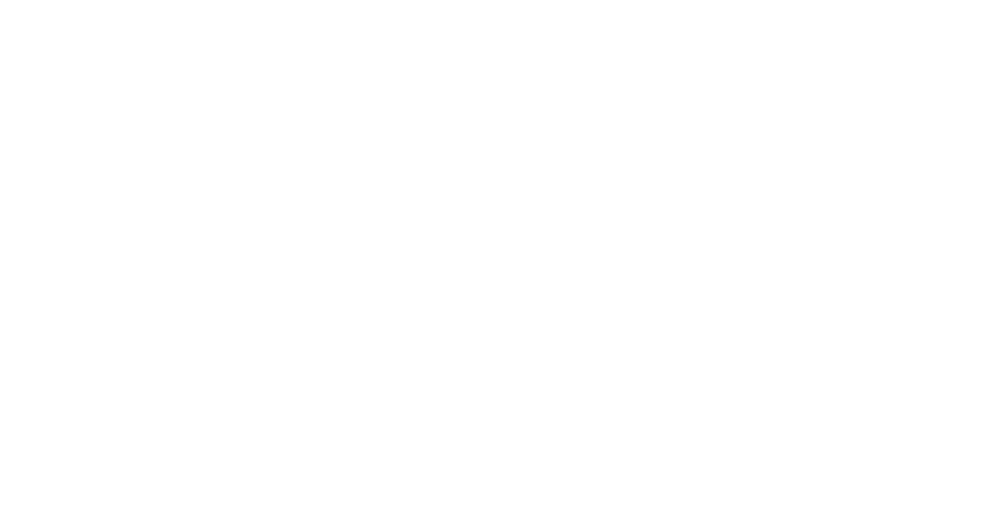

In [10]:
motor = vsr.Vec(1,0,1).trs() * vsr.Rot(vsr.Biv(1,0,0) * np.pi/6.0)
p1 = vsr.Dlp(vsr.Vec(0,0,1).unit(),0)
p2 = vsr.Dlp(vsr.Vec(1,0,1).unit(),1)
m = ((p2 * p1.inv()).log() * 0.5 ).exp()
v = m.trs().project_onto(m.rot().log().unit())
m.rot().biv()

scene = Scene(children=[plane_mesh(p1,width=3, height=3,color=Colors.HOTPINK),
                        plane_mesh(p2,width=3, height=3,color=Colors.LIGHTSKYBLUE),
                        vector_mesh(v, position=p1.loc(vsr.Vec(0,0,0).null()), arrow=True, color=Colors.GRAY),
                        bivector_mesh(m.rot().biv(),color=Colors.LIGHTGRAY),
                        frame_mesh(),
                        AmbientLight(color='#cccccc')])

camera = PerspectiveCamera(position=[3, -3, 3])
renderer = Renderer(camera=camera, 
                    scene=scene, 
                    controls=[TrackballControls(controlling=camera)],
                    background = 'white')
renderer.width = '960'
renderer.height = '512'
display(renderer)

## Direction vectors

In [10]:
vectors_a = [vsr.Vec(1,1,1).unit()]
vectors_b = [a.spin(motor.rot()) for a in vectors_a]
lines_a = [vsr.Dll(vsr.Vec(0,0,0).null(), vector.null()) for vector in vectors_a]
lines_b = [vsr.Dll(vsr.Vec(0,0,0).null(), vector.null()) for vector in vectors_b]

In [11]:
scene = Scene(children=

              [line_mesh(a,arrow=False,color=Colors.LIGHTGRAY) for a in lines_a] +\
              [line_mesh(b,arrow=False,color=Colors.LIGHTGRAY) for b in lines_b] +\
            [vector_mesh(a,arrow=True,color=Colors.HOTPINK) for a in vectors_a] +\
              [vector_mesh(b,arrow=True,color=Colors.LIGHTSKYBLUE) for b in vectors_b] +\
              [frame_mesh(),AmbientLight(color='#cccccc')])

camera = PerspectiveCamera(position=[3, -3, 3])
renderer = Renderer(camera=camera, 
                    scene=scene, 
                    controls=[TrackballControls(controlling=camera)],
                    background = 'white')
renderer.width = '960'
renderer.height = '512'
display(renderer)

## Circles

In [12]:
n_circles = 10
sigma = 0.09
points_a = [vsr.Vec(*np.random.normal(0.0, 0.3, 3)).null() 
            for i in range(n_circles)]
points_b = [point.spin(motor) for point in points_a]
points_b_noisy = [vsr.Vec(*(np.array(point)[:3] 
                            + sigma * np.random.randn(3))).null() 
                  for point in points_b]

radiuss = [np.random.rand() for i in range(n_circles)]
bivs = [vsr.Vec(*np.random.normal(0.0, 0.3, 3)).unit().unduale()
            for i in range(n_circles)]

circs_a = [vsr.Cir(p,r,b) for p,r,b in zip(points_a, radiuss, bivs)]
# circs_b = [vsr.Cir(p,r,b) for p,r,b in zip(points_b_noisy, radiuss, bivs)]
circs_b = [circle.spin(motor) for circle in circs_a]

In [13]:
c1 = vsr.Cir(vsr.Vec(1,0,1).null(), 0.5, vsr.Biv(-1,2,3).unit())
c2 = vsr.Cir(vsr.Vec(0,1,0.5).null(), 0.5, vsr.Biv(2,4,1).unit())

scene = Scene(children=[circle_mesh(c1, color=Colors.HOTPINK),
                        circle_mesh(c2, color=Colors.LIGHTSKYBLUE),
                        line_mesh(c1.axis(), arrow=False, color=Colors.HOTPINK),
                        line_mesh(c2.axis(), arrow=False, color=Colors.LIGHTSKYBLUE),
                        point_mesh(c1.pnt(), color=Colors.HOTPINK),
                        point_mesh(c2.pnt(), color=Colors.LIGHTSKYBLUE),
                        frame_mesh(),AmbientLight(color='#cccccc')])

camera = PerspectiveCamera(position=[3, -3, 3])
renderer = Renderer(camera=camera, 
                    scene=scene, 
                    controls=[TrackballControls(controlling=camera)],
                    background = 'white')
renderer.width = '960'
renderer.height = '512' 
display(renderer)

## Tangents

In [16]:
p1 = vsr.Vec(1,1,1).null()
p2 = p1.spin(motor)
v1 = p1.vec().unit()
v2 = p2.vec().unit()
l1 = vsr.Dll(p1,v1)
l2 = vsr.Dll(p2,v2)

scene = Scene(children=[point_mesh(p1,color=Colors.HOTPINK),
                        point_mesh(p2, color=Colors.LIGHTSKYBLUE),
                        vector_mesh(v1,position=p1.vec(), arrow=True, color=Colors.HOTPINK),
                        vector_mesh(v2,position=p2.vec(), arrow=True, color=Colors.LIGHTSKYBLUE),
                        line_mesh(l1, arrow=False, color=Colors.LIGHTGRAY),
                        line_mesh(l2, arrow=False, color=Colors.LIGHTGRAY),
                        frame_mesh(),AmbientLight(color='#cccccc')])

camera = PerspectiveCamera(position=[3, -3, 3])
renderer = Renderer(camera=camera, 
                    scene=scene, 
                    controls=[TrackballControls(controlling=camera)],
                    background = 'white')
renderer.width = '960'
renderer.height = '512' 
display(renderer)

## Point Pairs

In [24]:
p11 = vsr.Vec(1,1,1).null()
p12 = vsr.Vec(1,-1,1).null()

p21 = p11.spin(motor)
p22 = p12.spin(motor)

scene = Scene(children=[point_mesh(p11,color=Colors.HOTPINK),
                        point_mesh(p12,color=Colors.HOTPINK),
                        point_mesh(p21, color=Colors.RED),
                        point_mesh(p22, color=Colors.LIGHTSKYBLUE),
                        vector_mesh((p12.vec()-p11.vec()), position=p11.vec(), color=Colors.LIGHTGRAY),
                        vector_mesh((p22.vec()-p21.vec()), position=p21.vec(), color=Colors.LIGHTGRAY),

                        frame_mesh(),AmbientLight(color='#cccccc')])

camera = PerspectiveCamera(position=[3, -3, 3])
renderer = Renderer(camera=camera, 
                    scene=scene, 
                    controls=[TrackballControls(controlling=camera)],
                    background = 'white')
renderer.width = '960'
renderer.height = '512' 
display(renderer)